##**CART**

**LIBRARIES**

In [0]:
import numpy as np
from sklearn.datasets import load_iris

In [0]:
class Node:
    def __init__(self):
        #DEFAULT VALUES
        self.value = 0
        self.label = None
        self.feature = None
        self.left = None
        self.right = None

**Normal Decision Tree Algorithm**

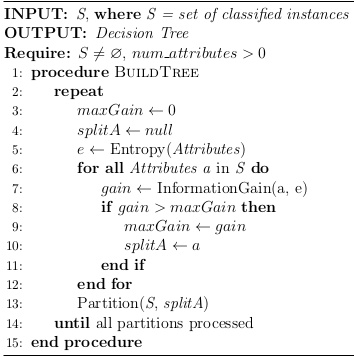

**In CART we use Gini Index instead of Gain because of several drawbacks of using Gain or Gain Ratio (they are biased)**

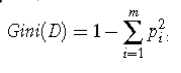

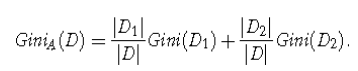

**Gini measure the attribute that maximizes the reduction in impurity or has the least Gini Index. Thus, we aim to minimize GiniA for an attribute to choose it as the splitting criteria.**

In [0]:
class DecisionTree:
    def __init__(self , features , labels  , min_sample_points):
        self.root = Node() #INITIALIZE ROOT
        self.features = np.array(features) #ALL FEATURES
        self.labels = np.array(labels) #UNIQUE LABELS (0 OR 1 HERE)
        self.min_sample_points = min_sample_points   #MINIMUM SAMPLES REQUIRED TO RUN CART
        self.included_features = []    #FEATURES THAT ARE ALREADY SELECTED FOR SPLITTING
    
    def gini_index(self,p , n):
        return 1-(p/(p+n))**2 - (n/(p+n))**2   #USE GINI INDEX FORMULA TO FIND INDEX OF THAT POSSIBLE NODE
    
    def find_split(self , node):
      number_of_features = len(self.features[0])
      lower_limit = 0
      upper_limit = 0
      feature = 0  #selected feature
      split = None
      min_gini = 1 #ACCORDING TO FORMULA FOR GINI INDEX
      left_p = 0
      left_n = 0
      right_p = 0
      right_n = 0
      
      for i in range(number_of_features):
        if i in self.included_features: #DO NOT CHOOSE FEATTURES THAT ARE ALREADY SELECTED
          continue
        #print(self.features[: , i])
        for test_split in self.features[: , i]:
          #INITIALIZE SAMPLES IN EACH NODE
          left_p = 0
          left_n = 0
          right_p = 0
          right_n = 0
          
          for label in range(len(self.labels)):
            if test_split > self.features[label , i]:
              if self.labels[label] == 1:
                left_p += 1
              else:
                left_n += 1
            elif test_split < self.features[label , i]:
                if self.labels[label] == 1:
                  right_p += 1
                else:
                  right_n += 1
          if left_p+left_n == 0 or right_p+right_n == 0:
            #SKIP IF THE SPLIT DOES NOT CLASSIFY ANY CLASS
            continue
          gini = (self.gini_index(left_p , left_n) +  self.gini_index(right_p , right_n))/2 #FIND GINI INDEX
          #print("split :- " , str(test_split) , " gini :- " , str(gini))
          #COMPARE TO GET MINIMAL GINI INDEX AND CHOOSE THE CORRESPONDING SPLIT FEATURE
          if min_gini > gini:
            min_gini = gini
            split = test_split
            feature = i 

      #ASSIGN VALUES AND FEATURE TO THE SPLITTED NODES 
      node.value = split
      node.feature = feature
      self.included_features.append(feature) #APPEND TO ALREADY CHOSEN FEATURE LIST
      return left_p , left_n , right_p , right_n #RETURN NODE DETAILS
    
    def generate_tree(self , node):
        node.right = Node() #INITIALIZE RIGHT NODE
        node.left = Node() #INITIALIZE LEFT NODE
        lp , ln , rp , rn = self.find_split(node) #FUNCTION CALL TO FIND THE BEST SPLITING ATTRIBUTE AND SPLITING NODE DATA
        
        if lp+ln > self.min_sample_points and len(self.features[0]) != len(self.included_features): #CHECK IF THERE ARE ENOUGH DATA SAMPLES AND LEFTOVER FEATURES
            self.generate_tree(node.left) #RECURSIVE CALL TO BUILD LEFT TREE USING COREESPONDING ATTRIBUTES AND DATA SAMPLES
        else:
            if lp > ln: #COUNT SAMPLES TO CLASSIFY NODE
                node.left.label = 1
            else:
                node.left.label = 0
                
        
        if rp+rn > self.min_sample_points and len(self.features[0]) != len(self.included_features): #CHECK IF THERE ARE ENOUGH DATA SAMPLES AND LEFTOVER FEATURES
            self.generate_tree(node.right) #RECURSIVE CALL TO BUILD RIGHT TREE
        else:
            if rp > rn: #COUNT SAMPLES TO CLASSIFY NODE
                node.right.label = 1
            else:
                node.right.label = 0
                
    def train(self):
        self.generate_tree(self.root) #START FROM ROOT
    
    def display(self , node = None):
        #DISPLY TREE USING ORDER TRAVERSAL (RECURSIVE)
        if node == None:
            node = self.root
        if node.left != None:
            self.display(node.left) #GO LEFT IF NOT EMPTY
        print("value: " , str(node.value) , " feature: " , str(node.feature) ," label: " , str(node.label))
        if node.right != None:
            self.display(node.right) #GO RIGHT IF NOT EMPTY
            
    def predict(self , y ):
        node = self.root
        while True:
            if node.label == None:
                if node.value > y[node.feature]: #MOVE DOWN THE TREE ACCORDING TO THE FEATURE VALUES (BY RANGE OR DISCRETE VALUES)
                    node = node.left
                else:
                    node = node.right
            else:
                return node.label #MOVE DOWN UNTIL YOU FIND A NODE WITH A LABEL (LEAF NODE)

In [0]:
iris = load_iris() #GET IRIS DATASET

In [0]:
import pandas as pd
x = pd.DataFrame(iris.data,columns=iris.feature_names) #GET INDEPENDENT FEATURES MATRIX X

In [0]:
y = pd.DataFrame(iris['target']) #GET TARGET VECTOR y

In [12]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [0]:
x=x.to_numpy()
y=y.to_numpy()

**Example CART Decision Tree on Iris Dataset (Ours will not be the same)**

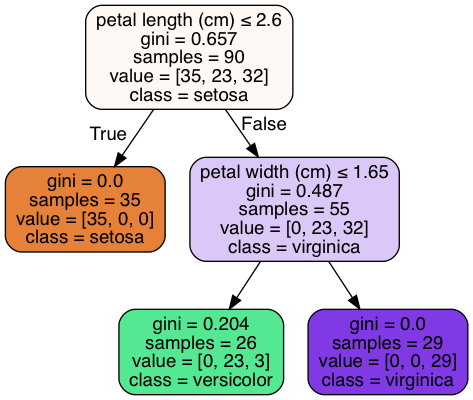

In [0]:
#x = [[70 , 120] , [65 , 110] , [78 , 160] , [80 , 110] , [72 , 152] , [55 , 130]]
#y = [1 , 0 , 1 , 1 , 0 , 0]
clf = DecisionTree(x[:120,:-1] , y[:120] , 2) #SEND 120 SAMPLES AND BUILD CART DECISION TREE

In [0]:
from numpy import arange
clf.train() #TRAIN USING THE GIVEN TRAINING DATA

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6. ]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2]
[1.4 1.4 1.3 1.5 1.4 1.7 

In [0]:
clf.display() #DISPLAY TREE AND LABELS

value :-  0  feature :-  None  label :-  0
value :-  2.4  feature :-  3  label :-  None
value :-  0  feature :-  None  label :-  0
value :-  4.4  feature :-  0  label :-  None
value :-  0  feature :-  None  label :-  0
value :-  1.1  feature :-  2  label :-  None
value :-  0  feature :-  None  label :-  0
value :-  2.2  feature :-  1  label :-  None
value :-  0  feature :-  None  label :-  0


In [0]:
clf.predict(y[125:]) #PREDICT CLASS OF A TEST SAMPLE

0